# NFL winning Predication and Full Data Analysis


## **Contents in this Project**

1. Data Loading and Summary Checking
2. Data Cleaning
3. Feature Extraction
4. EDA and Data Visualisation
5. Best teams  Clusters since 2008 based on Performance
6. NFL Match Winning Prediction 🏆


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)


## DataSet reading and understanding

In [3]:
Teams_Df = pd.read_csv('./Datasets/nfl_team_stats_2002-2023.csv')
Teams_Df.head()

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,third_down_att_away,third_down_comp_home,third_down_att_home,fourth_down_comp_away,fourth_down_att_away,fourth_down_comp_home,fourth_down_att_home,plays_away,plays_home,drives_away,drives_home,yards_away,yards_home,pass_comp_away,pass_att_away,pass_yards_away,pass_comp_home,pass_att_home,pass_yards_home,sacks_num_away,sacks_yards_away,sacks_num_home,sacks_yards_home,rush_att_away,rush_yards_away,rush_att_home,rush_yards_home,pen_num_away,pen_yards_away,pen_num_home,pen_yards_home,redzone_comp_away,redzone_att_away,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,9/5/2002,49ers,Giants,16,13,13,21,4,12,9,16,0,0,0,1,51,70,13,15,279,361,16,26,166,28,45,318,0,0,3,24,25,113,22,43,5,29,10,80,0,8,0,6,0,0,1,3,0,0,27:32:00,32:28:00
1,2002,1,9/8/2002,Jets,Bills,37,31,18,26,2,8,7,17,0,0,2,2,47,75,17,18,266,384,24,30,193,26,39,242,3,17,4,29,14,73,32,142,10,90,10,82,0,9,0,8,1,1,0,2,2,0,21:06,39:08:00
2,2002,1,9/8/2002,Vikings,Bears,23,27,19,20,5,13,7,13,0,0,0,0,62,60,17,17,368,368,16,28,228,20,33,288,1,6,1,9,33,140,26,80,8,52,4,33,0,7,0,6,1,1,2,1,0,0,31:31:00,28:29:00
3,2002,1,9/8/2002,Chargers,Bengals,34,6,27,13,6,10,4,11,0,0,0,0,65,48,11,15,401,203,15,19,160,18,31,167,1,0,4,31,45,241,13,36,4,39,9,57,0,7,0,5,0,0,0,1,0,0,37:48:00,22:12
4,2002,1,9/8/2002,Chiefs,Browns,40,39,24,24,5,11,4,11,0,0,0,0,59,61,20,17,470,411,20,29,276,28,40,352,0,0,1,7,30,194,20,59,9,87,4,38,0,10,0,10,0,1,1,0,0,0,30:16:00,29:44:00


In [4]:
Teams_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   season                 5929 non-null   int64 
 1   week                   5929 non-null   object
 2   date                   5929 non-null   object
 3   away                   5929 non-null   object
 4   home                   5929 non-null   object
 5   score_away             5929 non-null   int64 
 6   score_home             5929 non-null   int64 
 7   first_downs_away       5929 non-null   int64 
 8   first_downs_home       5929 non-null   int64 
 9   third_down_comp_away   5929 non-null   int64 
 10  third_down_att_away    5929 non-null   int64 
 11  third_down_comp_home   5929 non-null   int64 
 12  third_down_att_home    5929 non-null   int64 
 13  fourth_down_comp_away  5929 non-null   int64 
 14  fourth_down_att_away   5929 non-null   int64 
 15  fourth_down_comp_home

In [5]:
games_Df = pd.read_csv('./Datasets/Historical_Game_Stats.csv')
games_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        14073 non-null  object 
 1   schedule_season      14073 non-null  int64  
 2   schedule_week        14073 non-null  object 
 3   schedule_playoff     14073 non-null  bool   
 4   team_home            14073 non-null  object 
 5   score_home           13801 non-null  float64
 6   score_away           13801 non-null  float64
 7   team_away            14073 non-null  object 
 8   team_favorite_id     11322 non-null  object 
 9   spread_favorite      11322 non-null  float64
 10  over_under_line      11312 non-null  object 
 11  stadium              14073 non-null  object 
 12  stadium_neutral      14073 non-null  bool   
 13  weather_temperature  12525 non-null  float64
 14  weather_wind_mph     12509 non-null  float64
 15  weather_humidity     8476 non-null  

In [6]:
#games_Df['schedule_date'] = pd.to_datetime(games_Df['schedule_date'],format='mixed')
#games_Df_2002 = games_Df[games_Df['schedule_date'] >= '2002/01/01']

games_Df = games_Df.dropna(subset=['schedule_date'])
games_Df['schedule_date'] = pd.to_datetime(games_Df['schedule_date'],format='mixed')
games_Df_2002 = games_Df[games_Df['schedule_date'] >= '2002/01/01']
games_Df_2002.head()
games_Df_2002.shape # 6227
games_Df_2002.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6227 entries, 7846 to 14072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        6227 non-null   datetime64[ns]
 1   schedule_season      6227 non-null   int64         
 2   schedule_week        6227 non-null   object        
 3   schedule_playoff     6227 non-null   bool          
 4   team_home            6227 non-null   object        
 5   score_home           5955 non-null   float64       
 6   score_away           5955 non-null   float64       
 7   team_away            6227 non-null   object        
 8   team_favorite_id     5955 non-null   object        
 9   spread_favorite      5955 non-null   float64       
 10  over_under_line      5955 non-null   object        
 11  stadium              6227 non-null   object        
 12  stadium_neutral      6227 non-null   bool          
 13  weather_temperature  5087 non-null

In [7]:
games_Df_2002 = games_Df_2002.drop(columns=['weather_humidity','weather_detail','over_under_line','spread_favorite','score_away','score_home'])
games_Df_2002.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'team_away', 'team_favorite_id', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph'],
      dtype='object')

In [8]:
stadium_Df = pd.read_csv('./Datasets/nfl_stadiums.csv')
stadium_Df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   stadium_name                     120 non-null    object 
 1   stadium_location                 119 non-null    object 
 2   stadium_open                     90 non-null     float64
 3   stadium_close                    41 non-null     float64
 4   stadium_type                     109 non-null    object 
 5   stadium_address                  102 non-null    object 
 6   stadium_weather_station_zipcode  101 non-null    object 
 7   stadium_weather_type             117 non-null    object 
 8   stadium_capacity                 54 non-null     object 
 9   stadium_surface                  68 non-null     object 
 10  stadium_weather_station          62 non-null     object 
 11  stadium_weather_station_name     63 non-null     object 
 12  stadium_latitude      

In [9]:
stadium_Df = stadium_Df.drop(columns=['stadium_location','stadium_open','stadium_close','stadium_address','stadium_weather_station_zipcode',
                                      'stadium_capacity','stadium_weather_station','stadium_weather_station_name'])

In [10]:
stadium_Df['stadium_name'].unique()

array(['Acrisure Stadium', 'Alamo Dome', 'Allegiant Stadium',
       'Allianz Arena', 'Alltel Stadium', 'Alumni Stadium',
       'Anaheim Stadium', 'Arrowhead Stadium', 'AT&T Stadium',
       'Atlanta-Fulton County Stadium', 'Balboa Stadium',
       'Bank of America Stadium', 'Bills Stadium',
       'Busch Memorial Stadium', 'Caesars Superdome', 'Candlestick Park',
       'CenturyLink Field', 'Cinergy Field',
       'Cleveland Municipal Stadium', 'Cotton Bowl', 'Cowboys Stadium',
       'Dignity Health Sports Park', 'Dolphin Stadium',
       'Edward Jones Dome', 'Empower Field at Mile High',
       'Estadio Azteca', 'EverBank Field', 'FedEx Field', 'Fenway Park',
       'FirstEnergy Stadium', 'Ford Field', 'Foxboro Stadium',
       'Frankfurt Stadium', 'Franklin Field',
       'GEHA Field at Arrowhead Stadium', 'Georgia Dome',
       'Giants Stadium', 'Gillette Stadium', 'Hard Rock Stadium',
       'Harvard Stadium', 'Heinz Field', 'Highmark Stadium',
       "Houlihan's Stadium", 'Hous

# Data Clean up 

In [11]:
Teams_Df['win_away'] = Teams_Df['score_away'] > Teams_Df['score_home']
Teams_Df['win_home'] = Teams_Df['score_home'] > Teams_Df['score_away']


In [12]:
# Extract columns with "Away" and "Home" in their names
away_columns = [col for col in Teams_Df.columns if '_away' in col]
home_columns = [col for col in Teams_Df.columns if '_home' in col]

# Add common columns to both datasets
common_columns = ['season', 'week', 'date','away','home']

df_away = Teams_Df[common_columns + away_columns]
df_home = Teams_Df[common_columns + home_columns]


# Rename the columns to remove 'away' and 'home'
df_away.columns = common_columns + [col.replace('_away', '') for col in away_columns]
df_home.columns = common_columns + [col.replace('_home', '') for col in home_columns]

# Add a column to indicate team type
df_away['team_type'] = 'away'
df_home['team_type'] = 'home'

# Rename the 'away' and 'home' columns in each DataFrame to 'team' and 'opponent' accordingly
df_away = df_away.rename(columns={'away': 'team', 'home': 'opponent'})
df_home = df_home.rename(columns={'home': 'team', 'away': 'opponent'})

df_away['date'] = pd.to_datetime(df_away['date'],format='mixed')
df_home['date'] = pd.to_datetime(df_home['date'],format='mixed')
# Concatenate the datasets
#df_teams_All = pd.concat([df_away, df_home], ignore_index=True)

#df_teams_All.head()




In [13]:
#get all the look ups 
team_names_replacement_df = pd.read_excel('./Datasets/Team_Name_Lookup.xlsx')

team_names_replacement_df.head()

#replace the old team names with the new ones 
for index,row in team_names_replacement_df.iterrows(): 
   games_Df_2002['team_home'] = games_Df_2002['team_home'].str.replace(row['Historical Data'], row['Detailed Data'])
   games_Df_2002['team_away'] = games_Df_2002['team_away'].str.replace(row['Historical Data'], row['Detailed Data'])

print(" -------------------- ")
print(games_Df_2002['team_home'].unique())
print(" -------------------- ")
print(games_Df_2002['team_away'].unique())
print(" -------------------- ")


 -------------------- 
['Panthers' 'Bears' 'Lions' 'Colts' 'Dolphins' 'Saints' 'Giants' 'Raiders'
 'Steelers' 'Seahawks' 'Rams' 'Buccaneers' 'Titans' 'Commanders' 'Ravens'
 'Eagles' 'Packers' 'Patriots' 'Bills' 'Bengals' 'Browns' 'Broncos'
 'Texans' 'Jaguars' 'Falcons' 'Cowboys' 'Chiefs' 'Vikings' 'Jets'
 'Chargers' '49ers' 'Cardinals']
 -------------------- 
['Patriots' 'Jaguars' 'Cowboys' 'Broncos' 'Bills' '49ers' 'Packers' 'Jets'
 'Browns' 'Chiefs' 'Falcons' 'Eagles' 'Bengals' 'Cardinals' 'Vikings'
 'Buccaneers' 'Ravens' 'Raiders' 'Chargers' 'Rams' 'Colts' 'Lions'
 'Seahawks' 'Saints' 'Steelers' 'Bears' 'Titans' 'Dolphins' 'Texans'
 'Giants' 'Panthers' 'Commanders']
 -------------------- 


In [14]:

#merge the weather info with the away and home dataset and concate
merged_away_df = pd.merge(df_away, games_Df_2002, left_on=['date', 'team'], right_on=['schedule_date','team_away'], how='inner')

merged_home_df = pd.merge(df_home, games_Df_2002, left_on=['date', 'team'], right_on=['schedule_date','team_home'], how='inner')

df_teams_All = pd.concat([merged_away_df, merged_home_df], ignore_index=True)

df_teams_All.head()


,season,week,date,team,opponent,score,first_downs,third_down_comp,third_down_att,fourth_down_comp,fourth_down_att,plays,drives,yards,pass_comp,pass_att,pass_yards,sacks_num,sacks_yards,rush_att,rush_yards,pen_num,pen_yards,redzone_comp,redzone_att,fumbles,interceptions,def_st_td,possession,win,team_type,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,stadium,stadium_neutral,weather_temperature,weather_wind_mph
0,2002,1,2002-09-05,49ers,Giants,16,13,4,12,0,0,51,13,279,16,26,166,0,0,25,113,5,29,0,8,0,1,0,27:32:00,True,away,2002-09-05,2002,1,False,Giants,49ers,SF,Giants Stadium,False,75.0,12.0
1,2002,1,2002-09-08,Jets,Bills,37,18,2,8,0,0,47,17,266,24,30,193,3,17,14,73,10,90,0,9,1,0,2,21:06,True,away,2002-09-08,2002,1,False,Bills,Jets,NYJ,Ralph Wilson Stadium,False,75.0,7.0
2,2002,1,2002-09-08,Vikings,Bears,23,19,5,13,0,0,62,17,368,16,28,228,1,6,33,140,8,52,0,7,1,2,0,31:31:00,False,away,2002-09-08,2002,1,False,Bears,Vikings,CHI,Memorial Stadium (Champaign),False,76.0,5.0
3,2002,1,2002-09-08,Chargers,Bengals,34,27,6,10,0,0,65,11,401,15,19,160,1,0,45,241,4,39,0,7,0,0,0,37:48:00,True,away,2002-09-08,2002,1,False,Bengals,Chargers,CIN,Paul Brown Stadium,False,81.0,5.0
4,2002,1,2002-09-08,Chiefs,Browns,40,24,5,11,0,0,59,20,470,20,29,276,0,0,30,194,9,87,0,10,0,1,0,30:16:00,True,away,2002-09-08,2002,1,False,Browns,Chiefs,CLE,FirstEnergy Stadium,False,78.0,7.0


In [15]:
# merge the df_teams with the standium dataset

final_teams_df = pd.merge(df_teams_All, stadium_Df, left_on=['stadium'], right_on=['stadium_name'], how='inner')
final_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   season                11850 non-null  int64         
 1   week                  11850 non-null  object        
 2   date                  11850 non-null  datetime64[ns]
 3   team                  11850 non-null  object        
 4   opponent              11850 non-null  object        
 5   score                 11850 non-null  int64         
 6   first_downs           11850 non-null  int64         
 7   third_down_comp       11850 non-null  int64         
 8   third_down_att        11850 non-null  int64         
 9   fourth_down_comp      11850 non-null  int64         
 10  fourth_down_att       11850 non-null  int64         
 11  plays                 11850 non-null  int64         
 12  drives                11850 non-null  int64         
 13  yards           

In [16]:
#drop unwatnted columns after reviwing dataset info
final_teams_df = final_teams_df.drop(columns=['stadium_azimuthangle','stadium_elevation'])

In [17]:
# replace the null stadium surface type rows with valid values 

final_teams_df.loc[(final_teams_df['stadium_surface'].isnull()) & (final_teams_df['stadium_type'] == 'indoor'),'stadium_surface'] = 'FieldTurf' 

final_teams_df.loc[(final_teams_df['stadium_surface'].isnull()) & (final_teams_df['stadium_type'] == 'outdoor'),'stadium_surface'] = 'Grass' 

final_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   season                11850 non-null  int64         
 1   week                  11850 non-null  object        
 2   date                  11850 non-null  datetime64[ns]
 3   team                  11850 non-null  object        
 4   opponent              11850 non-null  object        
 5   score                 11850 non-null  int64         
 6   first_downs           11850 non-null  int64         
 7   third_down_comp       11850 non-null  int64         
 8   third_down_att        11850 non-null  int64         
 9   fourth_down_comp      11850 non-null  int64         
 10  fourth_down_att       11850 non-null  int64         
 11  plays                 11850 non-null  int64         
 12  drives                11850 non-null  int64         
 13  yards           

In [18]:
final_teams_clean =  final_teams_df.dropna()
final_teams_clean.head()

,season,week,date,team,opponent,score,first_downs,third_down_comp,third_down_att,fourth_down_comp,fourth_down_att,plays,drives,yards,pass_comp,pass_att,pass_yards,sacks_num,sacks_yards,rush_att,rush_yards,pen_num,pen_yards,redzone_comp,redzone_att,fumbles,interceptions,def_st_td,possession,win,team_type,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,stadium,stadium_neutral,weather_temperature,weather_wind_mph,stadium_name,stadium_type,stadium_weather_type,stadium_surface,stadium_latitude,stadium_longitude
0,2002,1,2002-09-05,49ers,Giants,16,13,4,12,0,0,51,13,279,16,26,166,0,0,25,113,5,29,0,8,0,1,0,27:32:00,True,away,2002-09-05,2002,1,False,Giants,49ers,SF,Giants Stadium,False,75.0,12.0,Giants Stadium,outdoor,cold,Grass,40.812222,-74.076944
1,2002,2,2002-09-15,Patriots,Jets,44,24,10,16,2,2,75,14,432,25,35,269,0,0,40,163,3,36,0,7,1,1,4,38:04:00,True,away,2002-09-15,2002,2,False,Jets,Patriots,NYJ,Giants Stadium,False,75.0,13.0,Giants Stadium,outdoor,cold,Grass,40.812222,-74.076944
2,2002,3,2002-09-22,Seahawks,Giants,6,7,4,12,0,0,45,14,145,16,25,105,2,13,18,40,6,37,0,3,0,1,0,23:10,False,away,2002-09-22,2002,3,False,Giants,Seahawks,NYG,Giants Stadium,False,76.0,12.0,Giants Stadium,outdoor,cold,Grass,40.812222,-74.076944
3,2002,5,2002-10-06,Chiefs,Jets,29,24,5,10,0,0,62,13,504,23,33,289,1,7,28,215,7,65,0,6,0,1,0,30:59:00,True,away,2002-10-06,2002,5,False,Jets,Chiefs,KC,Giants Stadium,False,63.0,13.0,Giants Stadium,outdoor,cold,Grass,40.812222,-74.076944
4,2002,6,2002-10-13,Falcons,Giants,17,15,8,13,0,0,51,10,313,19,25,246,2,11,24,67,3,20,0,4,0,0,0,29:58:00,True,away,2002-10-13,2002,6,False,Giants,Falcons,NYG,Giants Stadium,False,59.0,10.0,Giants Stadium,outdoor,cold,Grass,40.812222,-74.076944


In [19]:
final_teams_clean['win'].value_counts()

win
False    4737
True     4715
Name: count, dtype: int64

## Data Visualization

In [20]:
import plotly.express as px

In [21]:
# create a bar plot to see the Number of runs scored by different players and they get Player of Match
fig = px.bar(final_teams_clean, x='team', y='score', title='Number of runs scored by different teams',hover_name=final_teams_clean.index,color='score')
# show the plot
fig.show()

In [22]:
fig = px.scatter(final_teams_clean, x='score', y='team',color='score',
                 size='score', hover_name='team', title='team score')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

<Figure size 1500x1000 with 0 Axes>

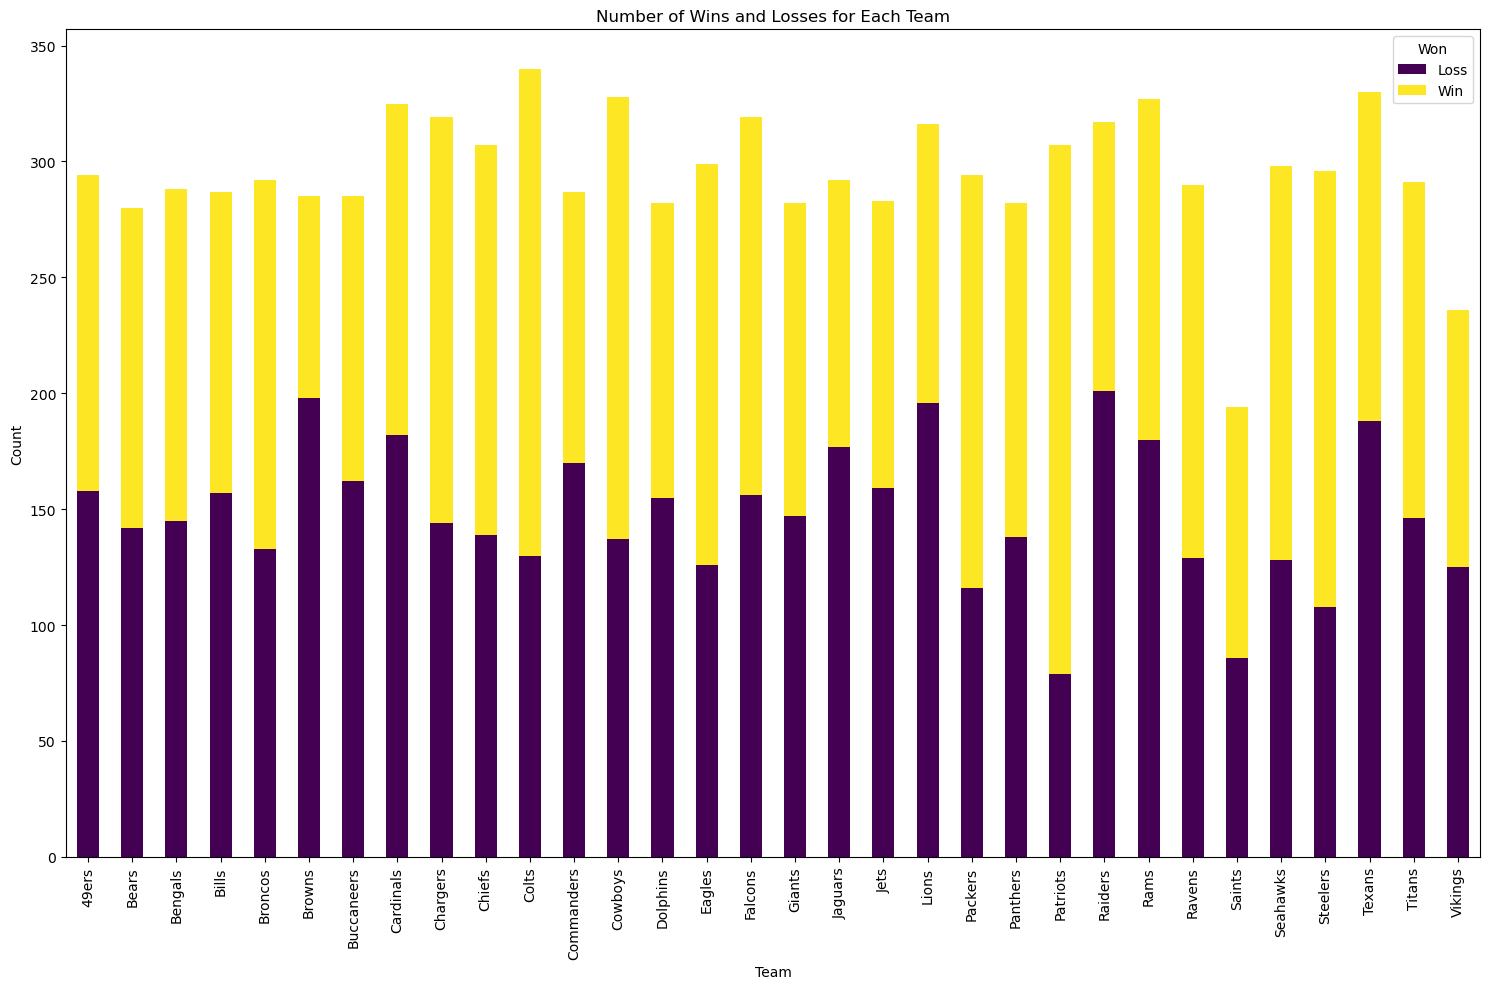

In [23]:
# Create a new column for the winning team

# Count the number of wins for each team
final_teams_clean.groupby("win")['team'].value_counts


team_win_counts = final_teams_clean.groupby(['team', 'win']).size().reset_index(name='count')

# Pivot the data to make it suitable for plotting
pivot_data = team_win_counts.pivot(index='team', columns='win', values='count').fillna(0)

# Plot the data
plt.figure(figsize=(15, 10))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 10))

# Customize the plot
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Number of Wins and Losses for Each Team')
plt.legend(title='Won', labels=['Loss', 'Win'])
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()



<Figure size 1500x1000 with 0 Axes>

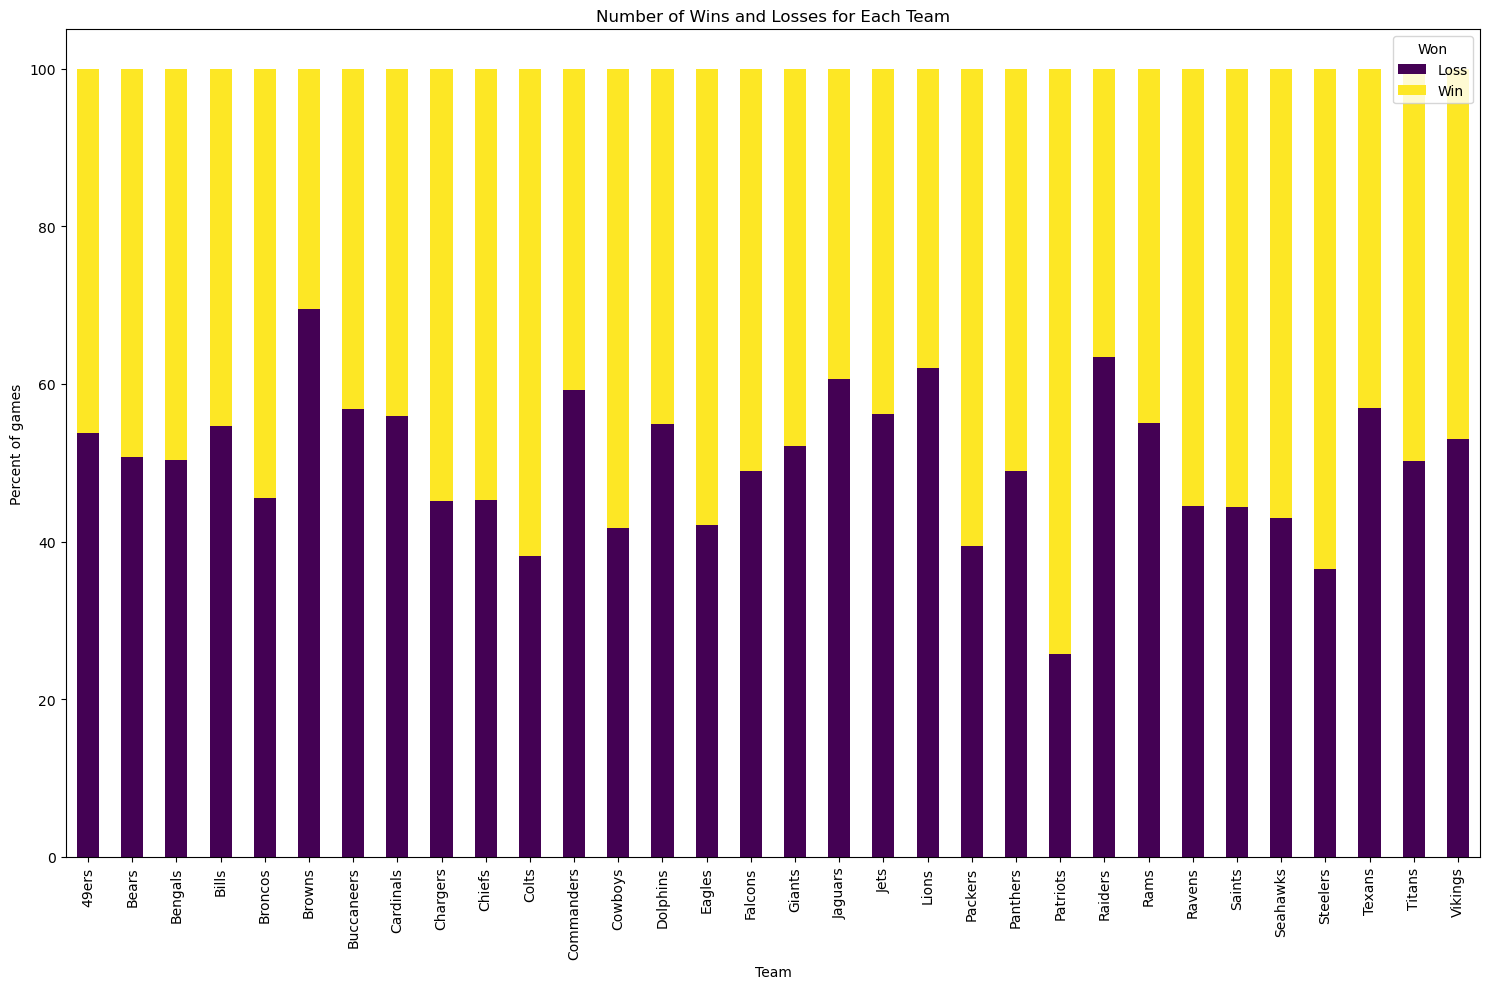

In [30]:
# Updated Stacked Bar chart to 100%

# Count the number of wins for each team
final_teams_clean.groupby("win")['team'].value_counts


team_win_counts = final_teams_clean.groupby(['team', 'win']).size().reset_index(name='count')

# Pivot the data to make it suitable for plotting
pivot_data = team_win_counts.pivot(index='team', columns='win', values='count').apply(lambda x: x*100/sum(x), axis=1).fillna(0)

# Plot the data
plt.figure(figsize=(15, 10))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 10))

# Customize the plot
plt.xlabel('Team')
plt.ylabel('Percent of games')
plt.title('Number of Wins and Losses for Each Team')
plt.legend(title='Won', labels=['Loss', 'Win'])
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()